In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate

from mpl_toolkits.mplot3d import Axes3D
from collections import deque  

sats = [(1, 5), (2, 6), (3, 7), (4, 8), (0, 8), (1, 9), (0, 7), (1, 8), (2, 9), (1, 2),
            (2, 3), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (0, 3), (1, 4), (2, 5), (3, 6),
            (4, 7), (5, 8), (0, 2), (3, 5), (4, 6), (5, 7), (6, 8), (7, 9), (0, 5), (1, 6),
            (2, 7), (3, 8), (4, 9), (3, 9), (0, 6), (1, 7), (3, 9)]
g1tap = [2,9]
g2tap = [1,2,5,7,8,9]
# -5000, -4500, -4000, -3500, -3000, -2500, -2000, -1500, -1000, -500, 0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000
def getCode(satsNum):
    
    g1 = deque(1 for i in range(10))
    g2 = deque(1 for i in range(10))
     
    # result
    g = []
    
    # Generating 1023 chips(One C/A sequence)
    for i in range(1023):
        val = (g1[9] + g2[satsNum[0]] + g2[satsNum[1]]) % 2
        g.append(val)
        
        #shift g1
        g1[9] = sum(g1[i] for i in g1tap) % 2
        g1.rotate()
        
        #shift g2
        g2[9] = sum(g2[i] for i in g2tap) % 2
        g2.rotate()
    # 0 => -1
    for n,i in enumerate(g):
            if i==0:
                g[n]=-1
        
    return g

# 코드 미리 만들어두기(시간복잡도 줄이려고)
codes = []
for i in range(37):
    codes.append(getCode(sats[i]))

## 파일 가져오기

In [18]:
f = open('live_record(1.567G, 50MHz, 25dB, 5M)_230513_2013_102s_SDR_검증.bin', 'rb')
data = np.fromfile(f, dtype=np.int16, count = int(50e6*10*2))
f.close()
# 측정값 오류로 인한 값들 양옆 중간값으로 치환
for i in range(0,len(data),250001):
    data[i] = (data[i-2]+ data[i+2]) / 2
    data[i+1] = (data[i-1] + data[i+3]) / 2

real = data[::2]
imag = data[1::2]
signal_data = real + 1j*imag


In [19]:
# 50MHz Sampling, 1.023MHz C/A code chip rate
# 50/1.023 samples per chip 
# Chip 마다 48 또는 49개의 sample이 생성된다는 건데 (47.78)
# 이 값들이 반복되는 주기를 구해야 함. 즉 (50 / 1.023) * X가 정수가 되기 위한 X의 최솟값
# 구해보면 1023 chip 마다 정수배가 되니까 (50000 sample 째에서 정수가 됨)
# C/A 코드 한 주기(1023 Chip 안에서 정해짐)
# 이만큼만 반복문 돌려서 각 chip당 몇 sample 넣을 건지 계산하면 됨

sample_count = []
cur = 0

for i in range(1,1024):
    cur = 50 * i /1.023
    sample_count.append(int(round(cur - round(50 * (i-1) / 1.023))))
    
print(*sample_count)
print(sum(sample_count))

49 49 49 49 48 49 49 49 49 49 49 49 48 49 49 49 49 49 49 49 48 49 49 49 49 49 49 49 48 49 49 49 49 49 49 49 48 49 49 49 49 49 49 49 48 49 49 49 49 49 49 49 48 49 49 49 49 49 49 49 48 49 49 49 49 49 49 49 48 49 49 49 49 49 49 49 48 49 49 49 49 49 49 49 48 49 49 49 49 49 49 49 48 49 49 49 49 49 49 49 48 49 49 49 49 49 49 49 48 49 49 49 49 49 49 49 48 49 49 49 49 49 49 49 48 49 49 49 49 49 49 49 48 49 49 49 49 49 49 49 48 49 49 49 49 49 49 49 49 48 49 49 49 49 49 49 49 48 49 49 49 49 49 49 49 48 49 49 49 49 49 49 49 48 49 49 49 49 49 49 49 48 49 49 49 49 49 49 49 48 49 49 49 49 49 49 49 48 49 49 49 49 49 49 49 48 49 49 49 49 49 49 49 48 49 49 49 49 49 49 49 48 49 49 49 49 49 49 49 48 49 49 49 49 49 49 49 48 49 49 49 49 49 49 49 48 49 49 49 49 49 49 49 48 49 49 49 49 49 49 49 48 49 49 49 49 49 49 49 48 49 49 49 49 49 49 49 48 49 49 49 49 49 49 49 48 49 49 49 49 49 49 49 49 48 49 49 49 49 49 49 49 48 49 49 49 49 49 49 49 48 49 49 49 49 49 49 49 48 49 49 49 49 49 49 49 48 49 49 49 49 49 49 4

In [20]:
# 기존 코드에서 가져와야 하는 것들
# 1. Received_signal : code Shift 함수만(나중에)
# 2. Replica 클래스 : C/A 코드 생성 적절하게 맞춰서 해야함 
# 그런데 이놈의 t는 어떻게 다뤄야 할지 생각해야 됨. 그냥 하면 되나?
# 3. Acquisition(일단 첫번째 목표), 위성번호는 matlab 파일에 나와 있으니까(5번이었나?)
# 해당 위성 번호 기준으로 Acquisition 돌렸을 때 제대로 peak가 나오는지 확인(가장 먼저 해야할 것)
# 더 이상 OV가 정수가 아니므로 코드들 적절하게 수정할 필요 있음
# 한 Chip 주기 당 50000개 sample(1ms), 한 bit면 백 만개 sample(0.02초, 20ms, chip 주기 20번)

In [21]:
class Replica:
    def __init__(self, code_delay, doppler_freq, IF_freq, svNumber, t0): # t0 = 이전 carrier의 마지막 phase. 교수님이 그려 주신 그림에서 Φ_n 말하는 거임 
        ca_code = np.array(codes[svNumber])
        ca_code = [chip for chip, cnt in zip(ca_code, sample_count) for _ in range(cnt)] # chip 당 해당하는 sample 개수 만큼 늘이기
        self.delayed_code = np.roll(ca_code, code_delay)
        
        t = np.arange(0, 50001) / (50000 * 1023)            # 한 주기 당 50000개 sample, 가장 뒷 자리는 밑에서 뺄 거임. 그래서 50001
                                                            # 분모 부분은 t가 0 ~ 1ms 범위가 되도록 조절해 준 거임
                                                            
        temp = np.exp(1j * 2 * np.pi * (doppler_freq + IF_freq) * t) * t0   
        self.oversampled_signal = temp[:-1]
        
        self.last = temp[-1] # 다음 replica에서 사용할 Φ_(n+1) (누적)
    def delay(self, delay):
        self.delayed_code = np.roll(self.delayed_code, delay)
    def signal(self):
        return self.delayed_code * self.oversampled_signal

In [22]:
def acquisition(signal, code_delay_range, doppler_freq_range,code_freq, svNumber):
    
    # 실 신호 중 1ms 만 가져와서 수행
    # 1ms 안에서 F(code 혹은 frame delay & 주파수 offset '대략적으로' 찾기)

    max_corr = 0
    max_code_delay = 0
    max_doppler_freq = 0
    corr_matrix = np.zeros((len(code_delay_range), len(doppler_freq_range)))
    
    for i, doppler_freq in enumerate(doppler_freq_range):
        replica = Replica(code_delay_range[0], doppler_freq, code_freq, svNumber, 1)

        for j, code_delay in enumerate(code_delay_range):
            
            # 전 방식이었던 replica를 옮기는 것과 다르게, 수신 신호를 옮기는 걸로 시도함
            step = sum(sample_count[:j+1])
            frac_signal = signal[j + step : j + step + 50000]
            
            cor = np.abs(correlate(frac_signal, replica.signal(), mode='valid'))
            peak = np.max(cor)
            corr_matrix[j, i] = peak
            
            if peak > max_corr:
                max_corr = peak
                max_code_delay = code_delay
                max_doppler_freq = doppler_freq
            
            # 1 chip씩 이동 (원래는 0.5chip씩 이동했었는데, 유리수의 반 chip은 애매해서 일단 1chip씩만 옮김)
            #replica.delay(sample_count[j])
            
    
    print('-'*40)
    print('Frame Sync completed.')
    print('Frame delay :', max_code_delay / (50/1.023))
    print('Estimated_Frequency Offset :', max_doppler_freq)
    print('Max correlation :', max_corr)
    print('-'*40)
    

    return max_code_delay, max_doppler_freq, corr_matrix

Acquisition

In [23]:
code_delay_range = np.arange(0, 50000, 50000/1023) # 50000 sample을 1023개로 나눔 (1chip 간격)
doppler_freq_range = np.linspace(-5000, 5000, 21)
code_freq = 8.42e6 

# 들어있는 위성 번호 : 5, 11, 13, 15, 20.
# 이 중에 하나 값을 -1 해서 넣어주면 됨
svNumber = 4


# Perform acquisition
estimated_code_delay, estimated_doppler_freq, corr_matrix = acquisition(signal_data, code_delay_range, doppler_freq_range, code_freq, svNumber)


----------------------------------------
Frame Sync completed.
Frame delay : 919.9999999999999
Estimated_Frequency Offset : -1000.0
Max correlation : 335934.4671642956
----------------------------------------


In [ ]:
# 지금 peak 값이 떠야 하는데, 안 뜨고 있는 상황임
# 아마 뜬다면 거의 몇 천만의 값은 나와야 할거야

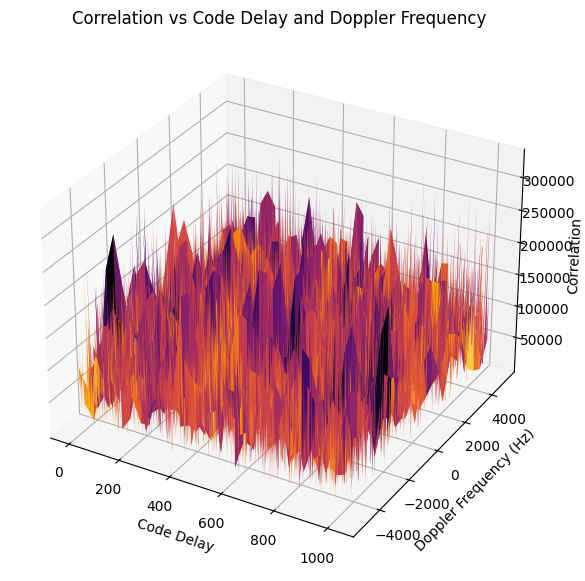

In [24]:
# Plotting
Code_Delay, Doppler_Freq = np.meshgrid(code_delay_range*(1023/50000), doppler_freq_range)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Code_Delay, Doppler_Freq, corr_matrix.T, cmap='inferno_r')
ax.set_xlabel('Code Delay')
ax.set_ylabel('Doppler Frequency (Hz)')
ax.set_zlabel('Correlation')
ax.set_title('Correlation vs Code Delay and Doppler Frequency')
plt.show()